In [1]:
library(Seurat)
library(ggplot2)

Attaching SeuratObject



In [2]:
pc = readRDS("BMPC_SeuratObj.rds")

Figure 4C & D: Visualization of CD38 expression on UMAP and summarizing the gene expression by cell cluster and FACS-soted cell label

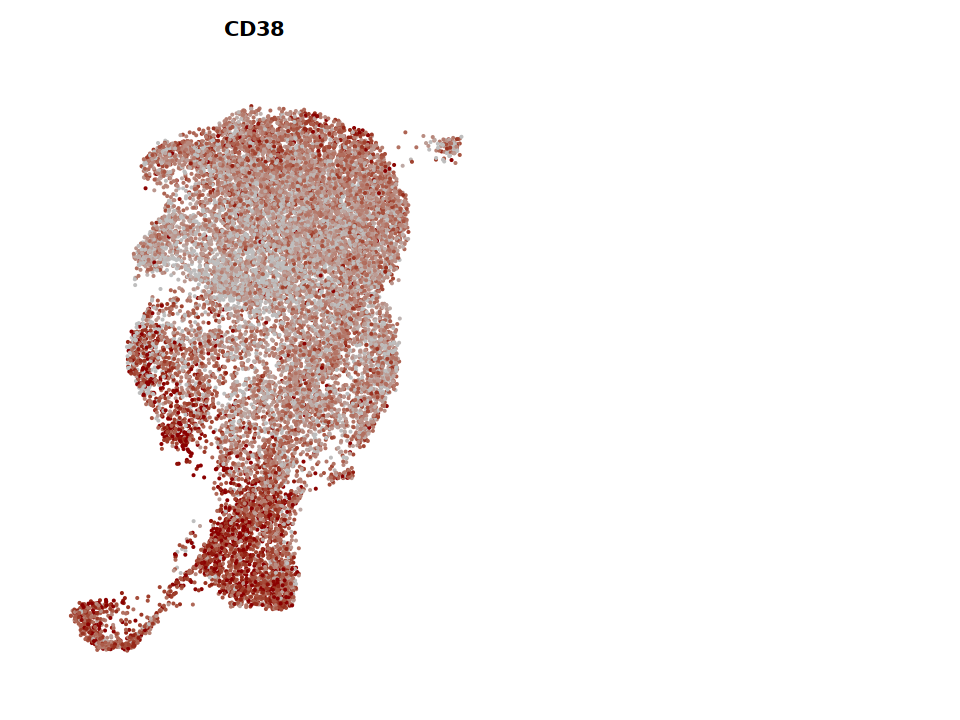

In [15]:
options(repr.plot.width=8, repr.plot.height=6)
FeaturePlot(object = pc, features = 'CD38',min.cutoff = "q05", max.cutoff = "q95",ncol = 2, col = c("grey","darkred")) + 
theme(axis.line=element_blank(),axis.text.x=element_blank(),
      axis.text.y=element_blank(),axis.ticks=element_blank(),
      axis.title.x=element_blank(),axis.title.y=element_blank(),
      panel.background=element_blank(),panel.border=element_blank(),
      panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
      plot.background=element_blank(),legend.position = "none",plot.title = element_text(size=12,face = "bold")) 


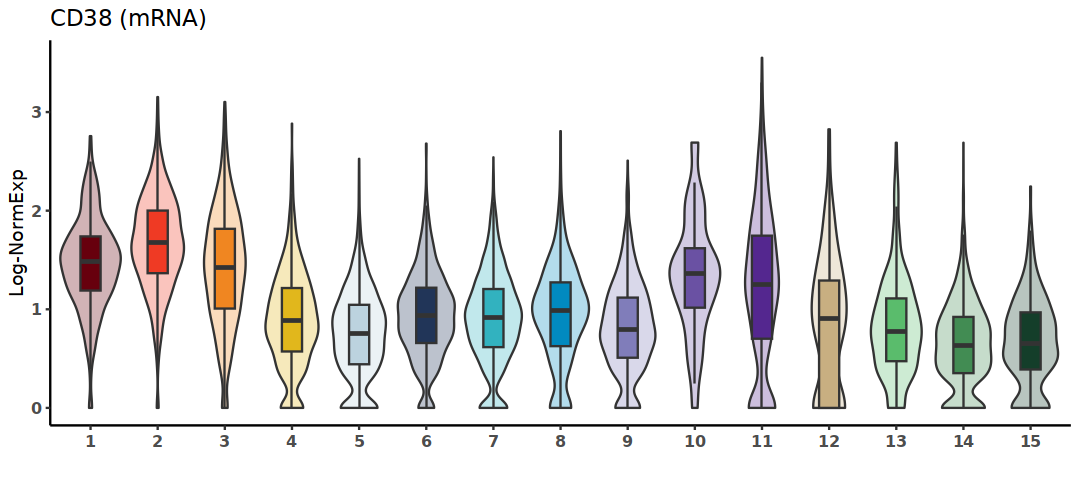

In [13]:
## Figure 4c
options(repr.plot.width=9, repr.plot.height=4)
temp = as.matrix(pc[["RNA"]]@data["CD38",])
temp = as.data.frame(temp)
temp$cluster_id = pc$cluster_id
temp$cell_type = pc$Cell_type

ggplot(temp,aes(x = factor(cluster_id),y = V1,fill = cluster_id)) + 
  geom_violin(alpha = 0.3)+
  geom_boxplot(width = 0.3,lwd=0.5,outlier.shape = NA)+
  #stat_summary(fun = mean, geom = "point", fill = "white",shape = 16,size = 1)+
  scale_fill_manual(values = c("#67000D", "#EF3A24", "#F08621",  "#E1B71C","#BCD3DF",
                 "#213558", "#32B2BF","#018AC0","#807DBA","#6A51A3",
                 "#54278F","#C8AF81","#5ABC6C","#428C53","#143E2A")) +
  ylab("Log-NormExp") +
  #scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  xlab("") +
  theme_classic()+
  theme(axis.text.x = element_text(angle = 0,vjust = 0.5,hjust = 0.5,size =9,face = "bold"),
        axis.text.y = element_text(size =9,face = "bold"),
        legend.position = "none") +
  ggtitle("CD38 (mRNA)")

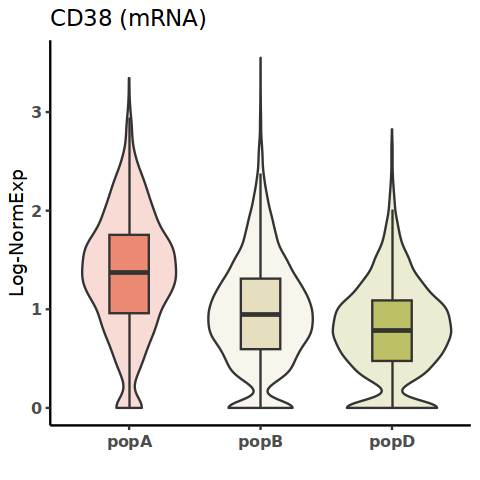

In [10]:
##Figure 4D
options(repr.plot.width=4, repr.plot.height=4)
ggplot(temp,aes(x = factor(cell_type),y = V1,fill = cell_type)) + 
  geom_violin(alpha = 0.3)+
  geom_boxplot(width = 0.3,lwd=0.5,outlier.shape = NA)+
  #stat_summary(fun = mean, geom = "point", fill = "white",shape = 16,size = 1)+
  scale_fill_manual(values = c("#EC8972","#E5DEBF","#BDC065")) +
  ylab("Log-NormExp") +
  #scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
  xlab("") +
  theme_classic()+
  theme(axis.text.x = element_text(angle = 0,vjust = 0.5,hjust = 0.5,size =9,face = "bold"),
        axis.text.y = element_text(size =9,face = "bold"),
        legend.position = "none") +
  ggtitle("CD38 (mRNA)")